<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


/tmp/ipython-input-3181434769.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)
/tmp/ipython-input-3181434769.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

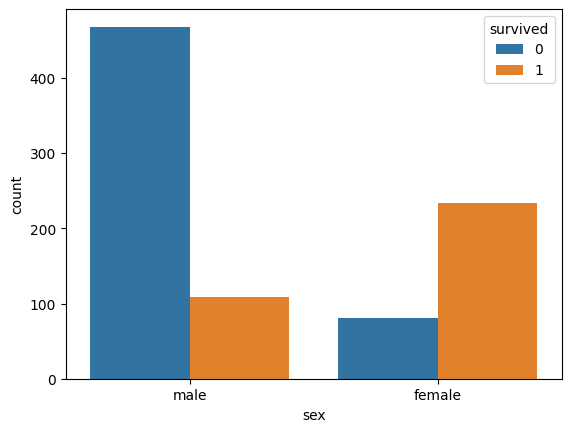

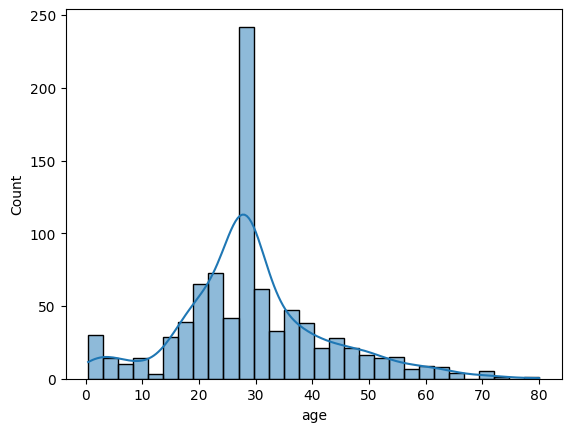

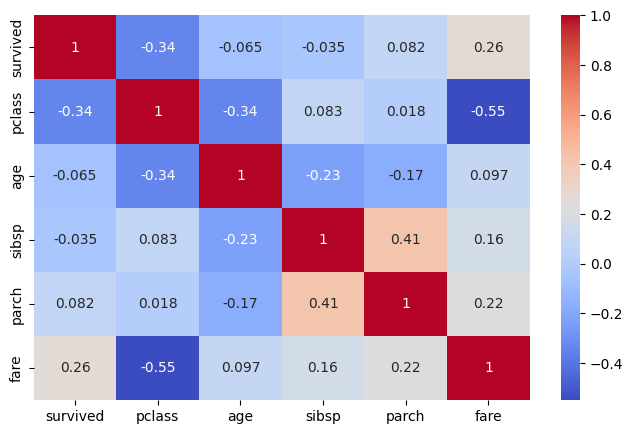

In [ ]:
from pandas.core.tools import numeric
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()
df['age'].fillna(df['age'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['deck'] = df['deck'].cat.add_categories(['Unknown'])
df['deck'].fillna('Unknown',inplace=True)
df.isnull().sum()
sns.countplot(x='sex',hue='survived',data=df)
plt.show()
sns.histplot(df['age'], bins=30, kde=True)
plt.show()
numeric_df = df.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()



### Training a Simple Machine Learning Model

First, we need to prepare our data by selecting the features (X) and the target variable (y). For the Titanic dataset, we will predict 'survived' based on other relevant features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Select features and target variable
# We need to convert categorical features to numerical using one-hot encoding
# Drop 'sex' and 'embarked' as they are already handled, and 'deck' is handled by Unknown
# Drop 'class' and 'embark_town' as they are redundant with 'pclass' and 'embarked'
# Drop 'who', 'adult_male', 'alone', 'alive' as they are highly correlated or derived from other features

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked', 'deck', 'pclass'], drop_first=True)

X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

# Remove any remaining non-numeric or irrelevant columns that might have been missed or created
X = X.select_dtypes(include=['number', 'bool'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Next, we will train a Logistic Regression model on the training data.

In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200) # Increased max_iter for convergence
model.fit(X_train, y_train)

print("Model training complete.")

Finally, we evaluate the model's performance on the test data using accuracy as a metric.

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy on the test set: {accuracy:.4f}")